In [55]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data = pd.read_csv('Book1.csv')

In [3]:
# Display the first few rows of the dataset
print(data.head())

   Temperature  Humidity  Light_Hours  Hen_Age_weeks  Feed_Quantity  \
0         28.1      65.3    15.997205             17          0.075   
1         26.7      68.2    13.935016             17          0.075   
2         23.5      72.1    15.508329             17          0.075   
3         29.9      60.8    12.014510             17          0.075   
4         22.2      73.9    12.643045             17          0.075   

  Health_Status  Hen_Count  Egg_count  
0       Healthy       2021          3  
1       Healthy       2002          3  
2       Healthy       1980          3  
3       Healthy       2019          3  
4       Healthy       1998          3  


In [7]:
# Handling missing values (if any)
data = data.dropna()

In [8]:
data.isna().sum()

Temperature      0
Humidity         0
Light_Hours      0
Hen_Age_weeks    0
Feed_Quantity    0
Health_Status    0
Hen_Count        0
Egg_count        0
dtype: int64

In [9]:
# Encoding categorical variables
data = pd.get_dummies(data, columns=['Health_Status'], drop_first=True)

In [10]:
data.head()

,Temperature,Humidity,Light_Hours,Hen_Age_weeks,Feed_Quantity,Hen_Count,Egg_count,Health_Status_Sick
0,28.1,65.3,15.997205,17,0.075,2021,3,False
1,26.7,68.2,13.935016,17,0.075,2002,3,False
2,23.5,72.1,15.508329,17,0.075,1980,3,False
3,29.9,60.8,12.014510,17,0.075,2019,3,False
4,22.2,73.9,12.643045,17,0.075,1998,3,False


In [11]:
# Selecting features and target variable
features = ['Temperature', 'Humidity', 'Light_Hours', 'Hen_Age_weeks', 'Feed_Quantity', 'Hen_Count', 'Health_Status_Sick']
target = 'Egg_count'

In [12]:
X = data[features]
y = data[target]

In [13]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Model Training
from sklearn.linear_model import LinearRegression

In [16]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [19]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 35323.1921334456
R-squared: 0.808837121847563


In [48]:
# Predicting for New Data
# Example new data
new_data = pd.DataFrame({
    'Temperature': [30.1],
    'Humidity': [45.3],
    'Light_Hours': [13.9],
    'Hen_Age_weeks': [22],
    'Feed_Quantity': [0.80],
    'Hen_Count': [500],
    'Health_Status_Sick': [0]  # Assuming the new data is for healthy hens
})

In [49]:
# Normalize the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

In [50]:
# Make prediction
new_prediction = model.predict(new_data_scaled)
print(f"Predicted Egg Count: {new_prediction[0]}")

Predicted Egg Count: 31340.134571466737


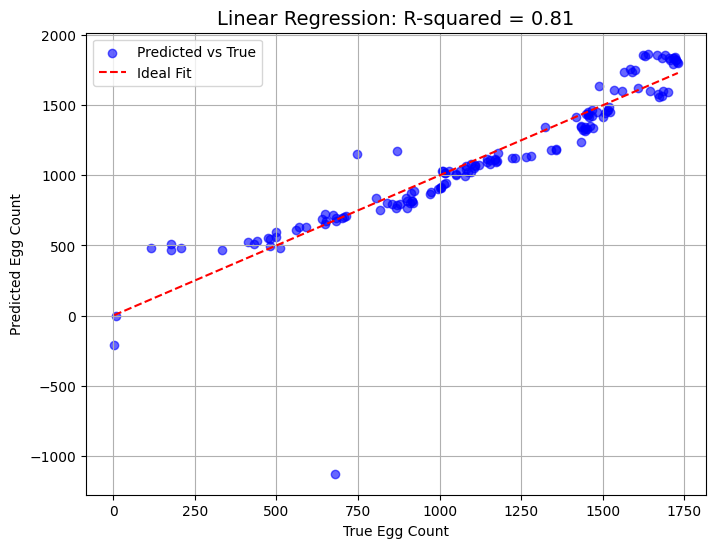

In [59]:
r2 = r2_score(y_test,y_pred)

# True values vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Linear Regression: R-squared = {r2:.2f}',fontsize=14)
plt.xlabel("True Egg Count")
plt.ylabel("Predicted Egg Count")
plt.legend()
plt.grid()
plt.show()
